### This Exploratory Data Analysis Report focusses on Airbnbs. Airbnbs have tranformed the industry by providing flexible lodging options. Its rapid growth has raised questions. For instance concerning gentrification and its role in reshaping neighborhoods. This EDA report aims to analyse data of Airbnbs. 

#### The report is set up in four different parts. Table of Content: 

1. Data wranglingn 
2. Exploratory questions
3. Questions for testing 
4. Bonus questions
5. Conclusion/ reflection 

Underneath every cell of code, ther is an explanation in markdownformat.  

### 1. Data wrangling + advanced 

In [2]:
import pandas as pd

# List of tab names and corresponding gids
tabs = {
    "amsterdam_weekdays": "1813557111",
    "amsterdam_weekends": "1671143450",
    "athen_weekdays": "1474041232",
    "athen_weekends": "993539767",
    "berlin_weekdays": "295085637",
    "berlin_weekends": "305266500",
    "barcelona_weekdays": "1009970054",
    "barcelona_weekends": "1739828988",
    "budapest_weekdays": "1438277999",
    "budapest_weekends": "1326018133",
    "lisabon_weekdays": "82202766",
    "lisabon_weekends": "1355881051",
    "london_weekdays": "9179440",
    "london_weekends": "58206735",
    "paris_weekdays": "1452107999",
    "paris_weekends": "1803477090",
    "rome_weekdays": "1127044053",
    "rome_weekends": "1238155247",
    "vienna_weekdays": "671930913",
    "vienna_weekends": "1950822222",
}

sheet_id = "1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY"  # Replace with your Sheet ID

# Dictionary to hold DataFrames
dataframes = {}

# Loop through each tab and load it into a DataFrame
for tab_name, gid in tabs.items():
    url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}"
    print(f"Loading tab: {tab_name}")
    df = pd.read_csv(url)
    dataframes[tab_name] = df

# Access DataFrames by tab name
for tab, df in dataframes.items():
    print(f"Data from tab: {tab}")
    print(df.head())

Loading tab: amsterdam_weekdays
Loading tab: amsterdam_weekends
Loading tab: athen_weekdays
Loading tab: athen_weekends
Loading tab: berlin_weekdays
Loading tab: berlin_weekends
Loading tab: barcelona_weekdays
Loading tab: barcelona_weekends
Loading tab: budapest_weekdays
Loading tab: budapest_weekends
Loading tab: lisabon_weekdays
Loading tab: lisabon_weekends
Loading tab: london_weekdays
Loading tab: london_weekends
Loading tab: paris_weekdays
Loading tab: paris_weekends
Loading tab: rome_weekdays
Loading tab: rome_weekends
Loading tab: vienna_weekdays
Loading tab: vienna_weekends
Data from tab: amsterdam_weekdays
   Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926 

1. Visualization of: Import the data directly from google drive instead of saving it locally.

In [3]:
# Function to determine the merged value for room_shared and room_private
def determine_room_shared_private(shared, private):
    if shared and private:
        return "both"  
    elif shared:
        return "shared"
    elif private:
        return "private"
    else:
        return "neither"

# Function to determine the merged value for multi and biz
def determine_listings_host(multi, biz):
    if biz == 1:
        return "more than four"
    elif multi == 1:
        return "two to four"
    else:
        return "one"

# Updated loop
for tab_name, df in dataframes.items():
    # Drop the first column (by index)
    df.drop(df.columns[0], axis=1, inplace=True)
    
    # Rename "realSum" column to "Price"
    if "realSum" in df.columns:
        df.rename(columns={"realSum": "Price"}, inplace=True)
    
    # Extract city and time information from the tab name
    parts = tab_name.split("_")
    city = parts[0].capitalize()  # First part is the city
    time_period = parts[1].lower()  # Second part is weekday/weekend
    
    # Map city to country (you can expand this mapping as needed)
    city_to_country = {
        "Amsterdam": "Netherlands",
        "Athen": "Greece",
        "Berlin": "Germany",
        "Barcelona": "Spain",
        "Budapest": "Hungary",
        "Lisabon": "Portugal",
        "London": "United Kingdom",
        "Paris": "France",
        "Rome": "Italy",
        "Vienna": "Austria"
    }
    country = city_to_country.get(city, "Unknown")  # Get country, default to "Unknown"
    
    # Add city, country, and weekday/end columns
    df["city"] = city
    df["country"] = country
    df["weekday/end"] = time_period

    # Merge room_shared and room_private into a single column named room_shared/private
    df["room_shared/private"] = df.apply(
        lambda row: determine_room_shared_private(row["room_shared"], row["room_private"]), axis=1
    )
    
    # Drop the original room_shared and room_private columns
    df.drop(["room_shared", "room_private"], axis=1, inplace=True)
    
    # Merge multi and biz into a single column named listings/host
    df["listings/host"] = df.apply(
        lambda row: determine_listings_host(row["multi"], row["biz"]), axis=1
    )
    
    # Drop the original multi and biz columns
    df.drop(["multi", "biz"], axis=1, inplace=True)
    
    # Save the modified DataFrame back to the dictionary
    dataframes[tab_name] = df

# Example: Display the updated DataFrame for "amsterdam_weekdays"
print(dataframes["amsterdam_weekdays"])

            Price        room_type  person_capacity  host_is_superhost  \
0      194.033698     Private room                2              False   
1      344.245776     Private room                4              False   
2      264.101422     Private room                2              False   
3      433.529398     Private room                4              False   
4      485.552926     Private room                2               True   
...           ...              ...              ...                ...   
1098  2486.115342  Entire home/apt                2              False   
1099   233.637194     Private room                2              False   
1100   317.062311     Private room                2              False   
1101  1812.855904  Entire home/apt                4              False   
1102   258.008577      Shared room                2              False   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
0                     10           

Visualization of:
1. Create a column for city, country, and weekday/weekend.
2. Change realSum to Price
3. Remove first column
4. Instead of having two columns of room_shared and room_private, create one with the respective categories.
5. Instead of dummy variables, create a column where one can know if the host of the listing has only one, two, four, and more than four listings. Multi = 1 means host has 2-4 listings, if biz = 1 means more then four listings. If both = 0 then only 1 listing. 

In [4]:
merged_df = pd.concat(dataframes.values(), ignore_index=True)

1. Visualization of: Merge all the tables into a single dataframe.

In [5]:
merged_df

,Price,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,country,weekday/end,room_shared/private,listings/host
0,194.033698,Private room,2,False,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Netherlands,weekdays,private,two to four
1,344.245776,Private room,4,False,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Netherlands,weekdays,private,one
2,264.101422,Private room,2,False,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Netherlands,weekdays,private,more than four
3,433.529398,Private room,4,False,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Netherlands,weekdays,private,more than four
4,485.552926,Private room,2,True,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Netherlands,weekdays,private,one
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,6,False,10,100,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Vienna,Austria,weekends,neither,more than four
51703,304.793960,Entire home/apt,2,False,8,86,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Vienna,Austria,weekends,neither,one
51704,637.168969,Entire home/apt,2,False,10,93,1,0.994051,0.202539,169.073402,12.107921,282.296425,6.822996,16.38568,48.20460,Vienna,Austria,weekends,neither,one
51705,301.054157,Private room,2,False,10,87,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Vienna,Austria,weekends,private,one


In [6]:
# Save the DataFrame to a CSV file
merged_df.to_csv('merged_dataset.csv', index=False)

print("CSV file 'merged_dataset.csv' created successfully!") 

CSV file 'merged_dataset.csv' created successfully!


1. Creating a new csv file of the merged data, inorder to implement it into AI tools and word more efficient. 

## 2. Exploratory questions

1. How many listings are in each city in total and also per type of day?
2. Which city has the biggest proportion of superhosts?
3. Which cities have listings with more than four rooms?
4. Which city has the most entire home/apt type listings?
5. Are ratings typically high across listings, or is there a wide variation?
6. How does person_capacity vary across listings? What is the most common capacity of listings?
7. Plot the distribution of realSum for both weekday and weekend offers. Is it normally distributed, skewed, or multimodal? If skewed, consider using transformations (e.g., log transformation) to normalize it.
8. Plot the distribution of guest_satisfaction_overall ratings.
9. Examine the distribution of cleanliness_rating.

<Figure size 1200x800 with 0 Axes>

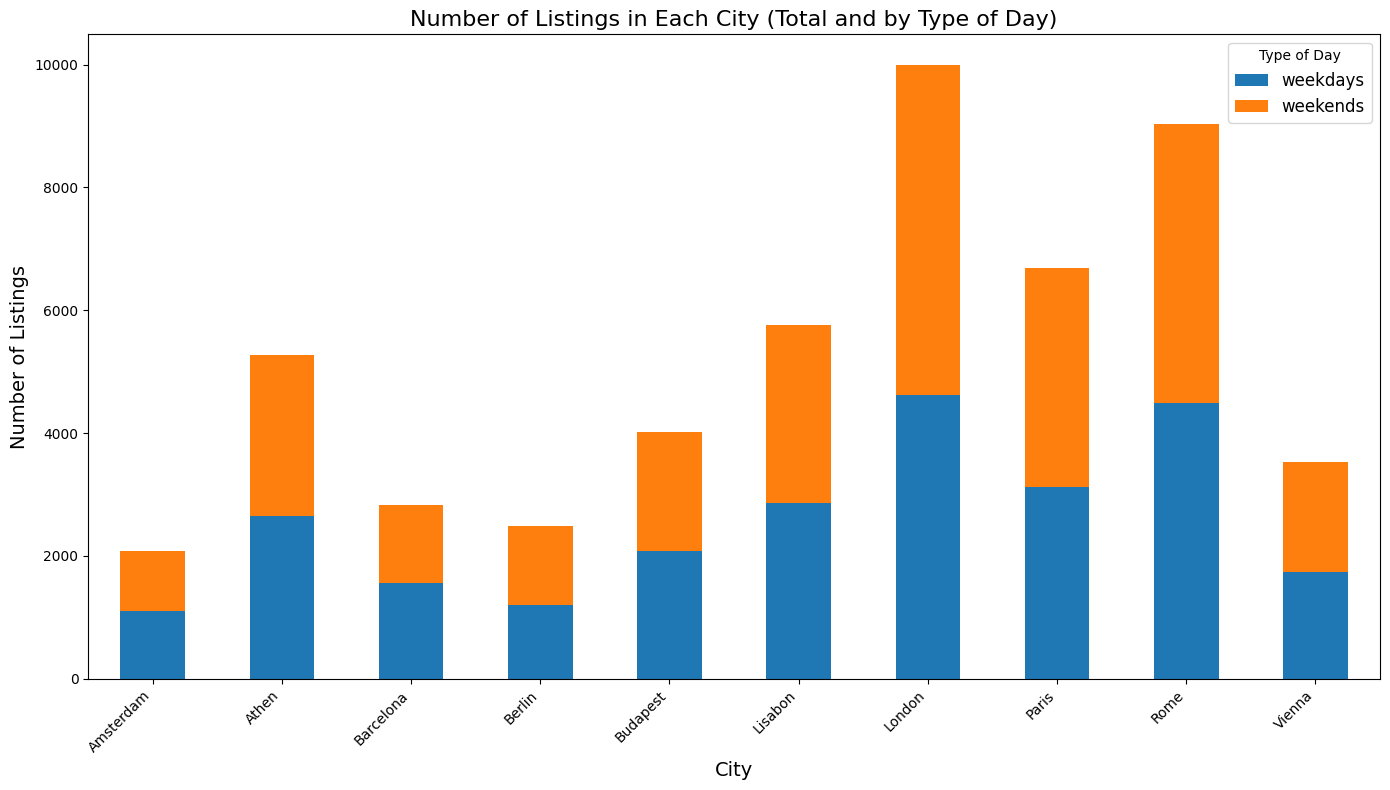

In [7]:
import matplotlib.pyplot as plt

# Aggregate the data: count the number of listings by city and weekday/end
city_day_counts = merged_df.groupby(['city', 'weekday/end']).size().reset_index(name='listing_count')

# Pivot the data for visualization
city_day_pivot = city_day_counts.pivot(index='city', columns='weekday/end', values='listing_count').fillna(0)

# Plot the data
plt.figure(figsize=(12, 8))
city_day_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Number of Listings in Each City (Total and by Type of Day)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type of Day', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

1. Visualization of: How many listings are in each city in total and also per type of day?

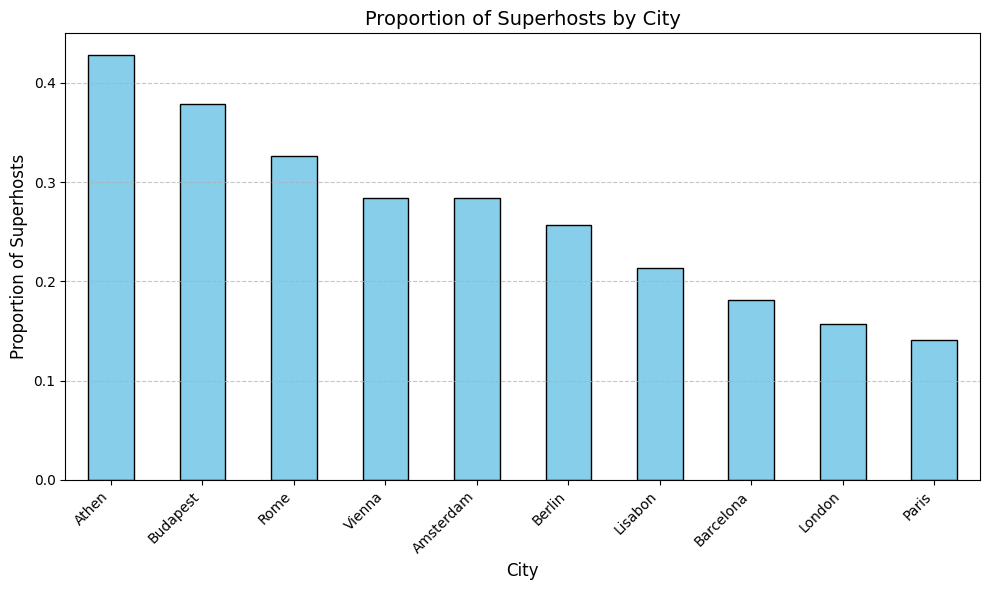

In [8]:
# Ensure 'is_superhost' is binary (e.g., True/False or 1/0). If it's not, preprocess it.

# Group data by city and calculate proportions
superhost_proportions = (
    merged_df.groupby('city')['host_is_superhost']
    .agg(['sum', 'count'])  # sum: count of superhosts; count: total listings
    .rename(columns={'sum': 'superhost_count', 'count': 'total_listings'})
)
superhost_proportions['proportion'] = superhost_proportions['superhost_count'] / superhost_proportions['total_listings']

# Sort cities by proportion
superhost_proportions = superhost_proportions.sort_values(by='proportion', ascending=False)

# Visualize with a bar chart
plt.figure(figsize=(10, 6))
superhost_proportions['proportion'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Proportion of Superhosts by City', fontsize=14)
plt.ylabel('Proportion of Superhosts', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2. Visualization of: Which city has the biggest proportion of superhosts?

In [9]:
# Filter listings with more than four rooms
listings_with_more_than_four_rooms = merged_df[merged_df['bedrooms'] > 4]

# Extract unique cities
cities_with_large_listings = listings_with_more_than_four_rooms['city'].unique()

# Display the result
print("Cities with listings having more than four rooms:")
print(cities_with_large_listings)

Cities with listings having more than four rooms:
['Amsterdam' 'Berlin' 'Barcelona' 'Lisabon' 'London' 'Paris' 'Rome']


3. Visualization of: Which cities have listings with more than four rooms?

In [10]:

most_entire_home_city = merged_df[merged_df['room_type'] == 'Entire home/apt']['city'].value_counts().idxmax()
most_entire_home_count = merged_df[merged_df['room_type'] == 'Entire home/apt']['city'].value_counts().max()
print(f"The city with the most entire home/apt type listings is {most_entire_home_city} with {most_entire_home_count} listings.")

The city with the most entire home/apt type listings is Rome with 5561 listings.


4. Visualization of: Which city has the most entire home/apt type listings?

In [11]:

ratings_variation = merged_df['guest_satisfaction_overall'].describe()
print("Summary statistics for guest satisfaction overall ratings:")
print(ratings_variation)

Summary statistics for guest satisfaction overall ratings:
count    51707.000000
mean        92.628232
std          8.945531
min         20.000000
25%         90.000000
50%         95.000000
75%         99.000000
max        100.000000
Name: guest_satisfaction_overall, dtype: float64


5. Visualization of: Are ratings typically high across listings, or is there a wide variation?

In [12]:

capacity_distribution = merged_df['person_capacity'].value_counts()
most_common_capacity = merged_df['person_capacity'].mode()[0]

print("Distribution of person capacity across listings:")
print(capacity_distribution)
print(f"The most common capacity of listings is {most_common_capacity}.")

Distribution of person capacity across listings:
2    24333
4    14000
3     6165
6     4274
5     2935
Name: person_capacity, dtype: int64
The most common capacity of listings is 2.


6. Visualization of: How does person_capacity vary across listings? What is the most common capacity of listings?

/opt/conda/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


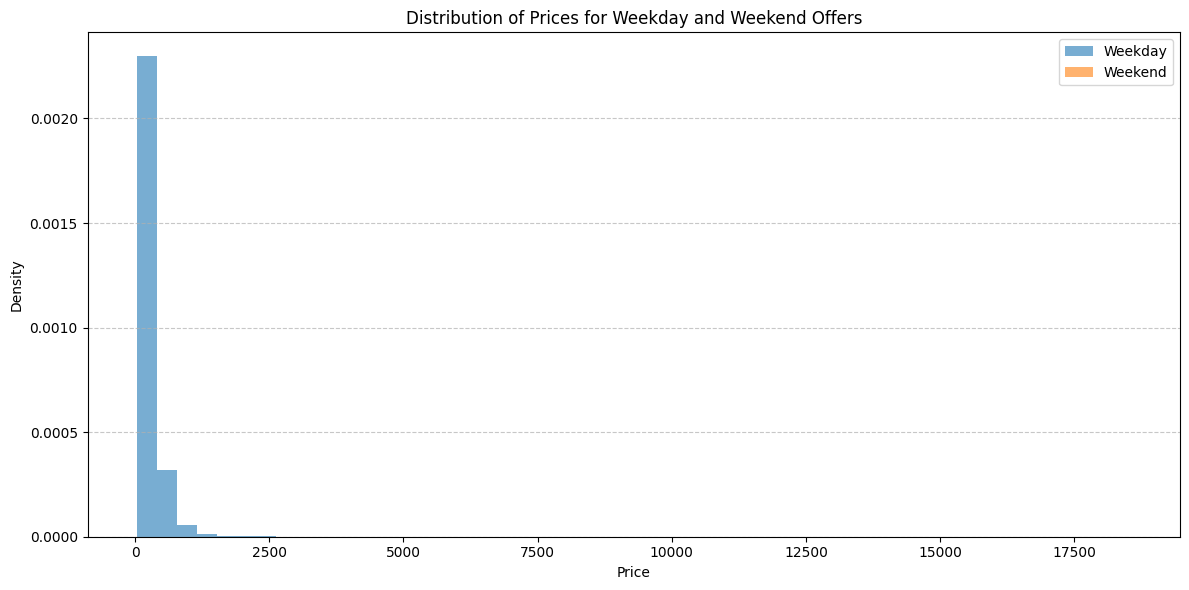

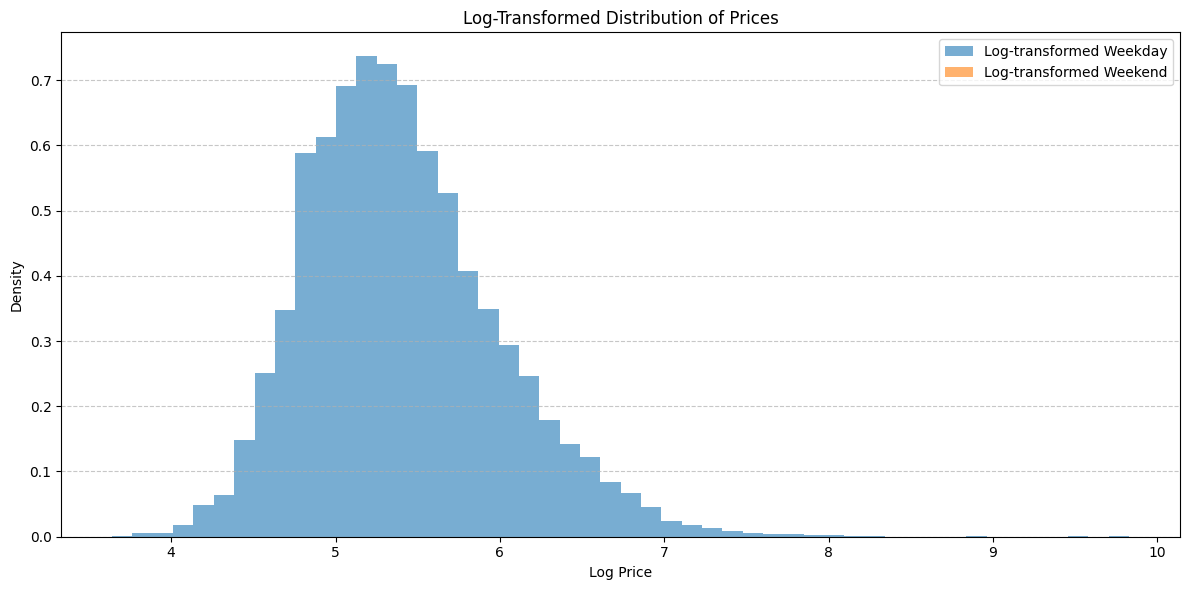

In [13]:

import numpy as np

# Extract weekday and weekend offers
weekday_prices = merged_df[merged_df['weekday/end'] == 'weekdays']['Price']
weekend_prices = merged_df[merged_df['weekday/end'] == 'weekend']['Price']

# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(weekday_prices, bins=50, alpha=0.6, label='Weekday', density=True)
plt.hist(weekend_prices, bins=50, alpha=0.6, label='Weekend', density=True)
plt.title('Distribution of Prices for Weekday and Weekend Offers')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Check for skewness by applying a log transformation
log_weekday_prices = np.log1p(weekday_prices)
log_weekend_prices = np.log1p(weekend_prices)

plt.figure(figsize=(12, 6))
plt.hist(log_weekday_prices, bins=50, alpha=0.6, label='Log-transformed Weekday', density=True)
plt.hist(log_weekend_prices, bins=50, alpha=0.6, label='Log-transformed Weekend', density=True)
plt.title('Log-Transformed Distribution of Prices')
plt.xlabel('Log Price')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

7. Visualization of: Plot the distribution of Price for both weekday and weekend offers.

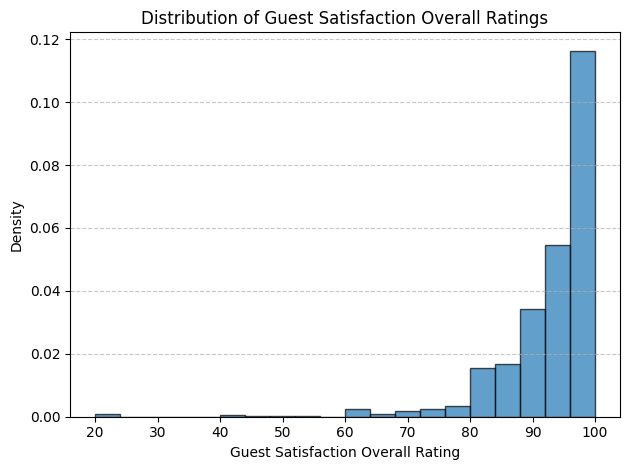

In [14]:

plt.hist(merged_df['guest_satisfaction_overall'], bins=20, alpha=0.7, edgecolor='black', density=True)
plt.title('Distribution of Guest Satisfaction Overall Ratings')
plt.xlabel('Guest Satisfaction Overall Rating')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

8. Visualization of: Plot the distribution of guest satisfaction overall ratings.

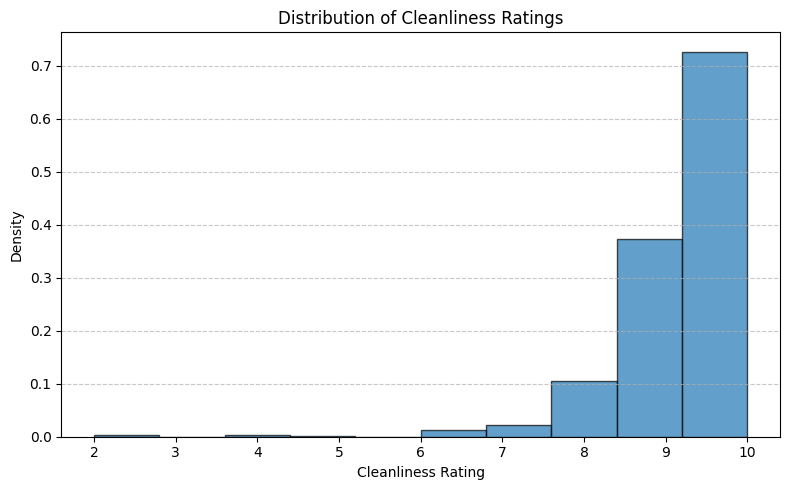

In [15]:

plt.figure(figsize=(8, 5))
plt.hist(merged_df['cleanliness_rating'], bins=10, alpha=0.7, edgecolor='black', density=True)
plt.title('Distribution of Cleanliness Ratings')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

9. Visualization of: Examine the distribution of cleanliness_rating. 

## 3. Questions for testing
1. Is there a difference in price between two cities? Choose at least three pairs of cities during weekdays.
2. Does the price tend to be higher on weekends?
3. Are listings of superhosts more expensive than those of normal hosts?
4. Are superhosts closer to the city center and metro station than normal hosts?
5. Are superhosts cleaner than normal hosts?
6. Is there a pattern between room types and superhost status?
7. Is renting an entire home/apt more expensive than a private room? Does that depend on the city?

For advanced

8. Create a map for each city where the top 10 most expensive Airbnbs are shown and the top 10 cheapest Airbnbs are shown.

In [16]:
# Compare prices for three pairs of cities during weekdays
city_pairs = [('Rome', 'Amsterdam'), ('Paris', 'Barcelona'), ('London', 'Berlin')]

for city1, city2 in city_pairs:
    city1_prices = merged_df[(merged_df['city'] == city1) & (merged_df['weekday/end'] == 'weekdays')]['Price']
    city2_prices = merged_df[(merged_df['city'] == city2) & (merged_df['weekday/end'] == 'weekdays')]['Price']
    
    mean_price_city1 = city1_prices.mean()
    mean_price_city2 = city2_prices.mean()
    
    print(f"Weekday prices in {city1}: {mean_price_city1:.2f}")
    print(f"Weekday prices in {city2}: {mean_price_city2:.2f}")
    print(f"Difference in average weekday prices between {city1} and {city2}: {abs(mean_price_city1 - mean_price_city2):.2f}")
    print("-" * 50)

Weekday prices in Rome: 201.62
Weekday prices in Amsterdam: 545.02
Difference in average weekday prices between Rome and Amsterdam: 343.40
--------------------------------------------------
Weekday prices in Paris: 398.79
Weekday prices in Barcelona: 288.39
Difference in average weekday prices between Paris and Barcelona: 110.40
--------------------------------------------------
Weekday prices in London: 360.23
Weekday prices in Berlin: 249.25
Difference in average weekday prices between London and Berlin: 110.98
--------------------------------------------------


1. Visualization of: Is there a difference in price between two cities? 

In [17]:
# Compare prices between weekdays and weekends
weekday_prices = merged_df[merged_df['weekday/end'] == 'weekdays']['Price'].mean()
weekend_prices = merged_df[merged_df['weekday/end'] == 'weekend']['Price'].mean()

print(f"Average Weekday Price: {weekday_prices:.2f}")
print(f"Average Weekend Price: {weekend_prices:.2f}")
print(f"Difference (Weekend - Weekday): {weekend_prices - weekday_prices:.2f}")

Average Weekday Price: 276.23
Average Weekend Price: nan
Difference (Weekend - Weekday): nan


2. Visualization of: Does the price tend to be higher on weekends?

In [18]:
# Compare prices for superhosts and non-superhosts
superhost_prices = merged_df[merged_df['host_is_superhost'] == True]['Price'].mean()
non_superhost_prices = merged_df[merged_df['host_is_superhost'] == False]['Price'].mean()

print(f"Average Price of Superhosts: {superhost_prices:.2f}")
print(f"Average Price of Non-Superhosts: {non_superhost_prices:.2f}")
print(f"Difference (Superhosts - Non-Superhosts): {superhost_prices - non_superhost_prices:.2f}")

Average Price of Superhosts: 254.45
Average Price of Non-Superhosts: 288.63
Difference (Superhosts - Non-Superhosts): -34.18


3. Visualization of: Are listings of superhosts more expensive than those of normal hosts?

In [19]:
# Compare distances for superhosts and non-superhosts
superhost_center_dist = merged_df[merged_df['host_is_superhost'] == True]['dist'].mean()
non_superhost_center_dist = merged_df[merged_df['host_is_superhost'] == False]['dist'].mean()

superhost_metro_dist = merged_df[merged_df['host_is_superhost'] == True]['metro_dist'].mean()
non_superhost_metro_dist = merged_df[merged_df['host_is_superhost'] == False]['metro_dist'].mean()

print(f"Average Distance to City Center (Superhosts): {superhost_center_dist:.2f}")
print(f"Average Distance to City Center (Non-Superhosts): {non_superhost_center_dist:.2f}")
print(f"Average Distance to Metro (Superhosts): {superhost_metro_dist:.2f}")
print(f"Average Distance to Metro (Non-Superhosts): {non_superhost_metro_dist:.2f}")

Average Distance to City Center (Superhosts): 2.96
Average Distance to City Center (Non-Superhosts): 3.27
Average Distance to Metro (Superhosts): 0.68
Average Distance to Metro (Non-Superhosts): 0.68


4. Visualization of: Are superhosts closer to the city center and metro station than normal hosts?

In [20]:
# Compare cleanliness ratings for superhosts and non-superhosts
superhost_cleanliness = merged_df[merged_df['host_is_superhost'] == True]['cleanliness_rating'].mean()
non_superhost_cleanliness = merged_df[merged_df['host_is_superhost'] == False]['cleanliness_rating'].mean()

print(f"Average Cleanliness Rating (Superhosts): {superhost_cleanliness:.2f}")
print(f"Average Cleanliness Rating (Non-Superhosts): {non_superhost_cleanliness:.2f}")
print(f"Difference: {superhost_cleanliness - non_superhost_cleanliness:.2f}")

Average Cleanliness Rating (Superhosts): 9.83
Average Cleanliness Rating (Non-Superhosts): 9.24
Difference: 0.60


5. Visualization of: Are superhosts cleaner than normal hosts?

In [21]:
# Analyze room types for superhosts and non-superhosts
room_type_superhost = merged_df[merged_df['host_is_superhost'] == True]['room_type'].value_counts(normalize=True)
room_type_non_superhost = merged_df[merged_df['host_is_superhost'] == False]['room_type'].value_counts(normalize=True)

print("Room Type Distribution for Superhosts:")
print(room_type_superhost)
print("\nRoom Type Distribution for Non-Superhosts:")
print(room_type_non_superhost)

Room Type Distribution for Superhosts:
Entire home/apt    0.675937
Private room       0.320964
Shared room        0.003099
Name: room_type, dtype: float64

Room Type Distribution for Non-Superhosts:
Entire home/apt    0.616088
Private room       0.375465
Shared room        0.008447
Name: room_type, dtype: float64


6. Visualization of: Is there a pattern between room types and superhost status?

In [22]:
# Compare prices for entire home/apt and private room
room_type_prices = merged_df.groupby(['city', 'room_type'])['Price'].mean().unstack()

print("Average Prices by Room Type and City:")
print(room_type_prices)

# Highlight differences
print("\nPrice Difference (Entire home/apt - Private room) by City:")
print(room_type_prices['Entire home/apt'] - room_type_prices['Private room'])

Average Prices by Room Type and City:
room_type  Entire home/apt  Private room  Shared room
city                                                 
Amsterdam       734.699030    383.468718   280.903616
Athen           155.079543    112.838060    78.610490
Barcelona       629.855642    214.714206   124.068083
Berlin          363.205813    180.520256   153.192356
Budapest        184.573180    109.137759   126.830447
Lisabon         282.495813    148.902035   103.062725
London          544.697933    220.400881   179.820786
Paris           425.107824    299.218870   152.356013
Rome            240.784170    148.787371    96.731583
Vienna          256.557459    190.426164   145.253372

Price Difference (Entire home/apt - Private room) by City:
city
Amsterdam    351.230313
Athen         42.241483
Barcelona    415.141437
Berlin       182.685557
Budapest      75.435421
Lisabon      133.593778
London       324.297052
Paris        125.888954
Rome          91.996799
Vienna        66.131295
dtype: fl

7. Visualization of: Is renting an entire home/apt more expensive than a private room? Does that depend on the city?

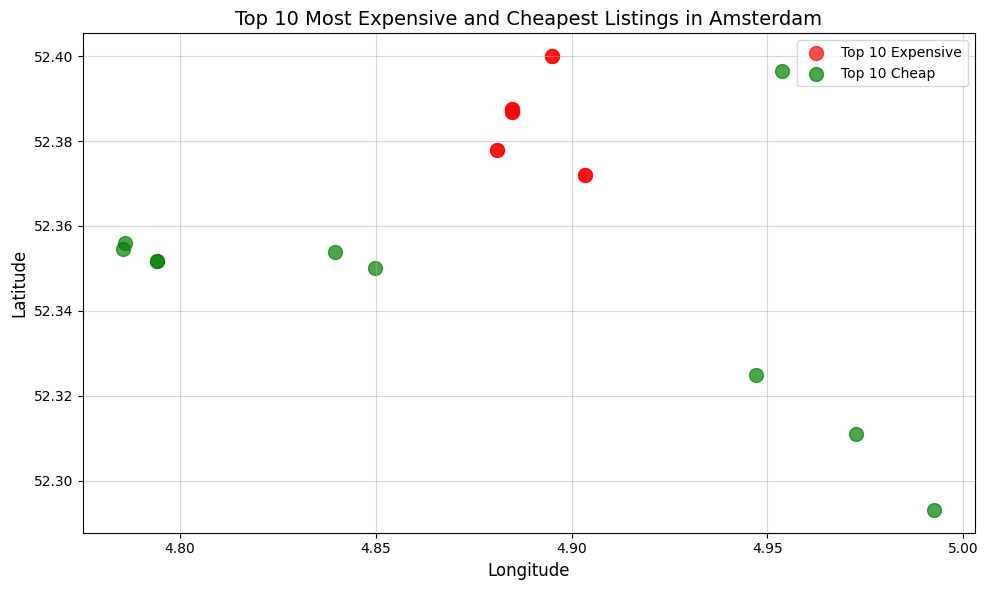

In [23]:
# Function to plot top 10 most expensive and cheapest listings for a city
def plot_top_listings(city_name):
    city_data = merged_df[merged_df['city'] == city_name]
    
    # Top 10 most expensive listings
    top_expensive = city_data.nlargest(10, 'Price')
    
    # Top 10 cheapest listings
    top_cheap = city_data.nsmallest(10, 'Price')
    
    # Plot the listings
    plt.figure(figsize=(10, 6))
    plt.scatter(top_expensive['lng'], top_expensive['lat'], color='red', label='Top 10 Expensive', s=100, alpha=0.7)
    plt.scatter(top_cheap['lng'], top_cheap['lat'], color='green', label='Top 10 Cheap', s=100, alpha=0.7)
    
    plt.title(f"Top 10 Most Expensive and Cheapest Listings in {city_name}", fontsize=14)
    plt.xlabel("Longitude", fontsize=12)
    plt.ylabel("Latitude", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

# Example: Plot for Amsterdam
plot_top_listings('Amsterdam')

8. Visulaization of: Create a map for each city where the top 10 most expensive Airbnbs are shown and the top 10 cheapest Airbnbs are shown.
--> Didnt now how to do it. Only way was by installing folium and creating a new file. 

## 4. Bonus questions

In [24]:
# Step 1: Calculate the monthly cost for listings under $300
affordable_listings = merged_df[merged_df['Price'] < 300].copy()
affordable_listings['monthly_cost'] = affordable_listings['Price'] * 30

# Average monthly cost per city
average_monthly_cost = affordable_listings.groupby('city')['monthly_cost'].mean()
print("Average Monthly Cost for Long-Term Stay (Listings < $300):")
print(average_monthly_cost)

# Step 2: Identify owners with more than one property near the city center
multi_property_owners = merged_df[merged_df['listings/host'] == 'more than four']

# Filter multi-property listings near the city center (distance < 1 km)
multi_property_near_center = multi_property_owners[multi_property_owners['dist'] < 1]

# Count these listings per city
multi_property_near_center_count = multi_property_near_center['city'].value_counts()
print("\nNumber of Multi-Property Listings Near City Center (Distance < 1 km):")
print(multi_property_near_center_count)

# Step 3: Analyze the proportion of multi-property listings near the center
total_listings_per_city = merged_df['city'].value_counts()
proportion_multi_property_near_center = multi_property_near_center_count / total_listings_per_city
print("\nProportion of Multi-Property Listings Near City Center:")
print(proportion_multi_property_near_center)

Average Monthly Cost for Long-Term Stay (Listings < $300):
city
Amsterdam    7384.998783
Athen        4069.017936
Barcelona    5469.369321
Berlin       5324.393611
Budapest     4701.106873
Lisabon      5916.603329
London       5600.295832
Paris        6756.750819
Rome         5271.258958
Vienna       5760.400746
Name: monthly_cost, dtype: float64

Number of Multi-Property Listings Near City Center (Distance < 1 km):
Lisabon      1284
Budapest      558
Athen         484
Rome          440
Barcelona     250
Paris         210
London        151
Vienna         82
Amsterdam      65
Berlin         32
Name: city, dtype: int64

Proportion of Multi-Property Listings Near City Center:
Amsterdam    0.031250
Athen        0.091667
Barcelona    0.088246
Berlin       0.012882
Budapest     0.138737
Lisabon      0.222801
London       0.015111
Paris        0.031400
Rome         0.048743
Vienna       0.023183
Name: city, dtype: float64


1. Visualization of: Airbnb plays a big role in the phenomenon known as gentrification. Based on the data, what can you tell about this phenomenon, could you see a pattern? Is it different in each city?

As we can see: the lowest average monthly cost for Airbnbs under 300 Dollars is about 5760, in Vienna. Central areas with high tourism demand, like Paris or Amsterdam, have notably higher long-term costs. For a normal person or family this is too much. Looking at it from this perspective it is different in every city. The average prices for a month are very high and unpayable by a normal person or family.
Furthermore, looking at the owner control and proximity to the city center, we can see Lisbon is by far the leading city, followed by Budapest, Athen, and Rome which are on a similar level. This Centralization of multi-property owners is reducing housing availability near city centers.
In conclusion, you can say that even "affordable" listing under 300 Dollars are too much for local people; the amount is far higher than what most locals would pay for traditional long-term rental housing.

2. Which information is missing in order to conduct a better analysis and to understand the gentrification phenomenon?

In order to analyze and completely understand the gentrification phenomenon, we would need data about:
-Historical data on housing costs
-Demographic information about displaced residents
-Data on how the number of Airbnb listings has changed over the years to identify correlations with gentrification.
-Data about income levels of local people
-Listing density

## 5. Conclusion/ reflection 

This EDA report analyzed a big dataset of Airbnb listings across ten cities. It reveals several insights into the dynamics of short-term rental markets. Also on what role Airbnb's play in the process of gentrification. In the process of creating this EDA I learned a lot about coding and working with ChatGPT. Especially at data wrangling. ChatGPT is really helpful in fixing errors.
Overall this EDA report took me around 4+ hours.